In [1]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Each pixel are in the 0-255 range, where 0 is black and 255 is white (for grayscale images).
# Image = Second order tensor
img = np.zeros((3,3), dtype=np.uint8)
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [5]:
# Convert the image to a color image (BGR)
# Image = Third order tensor (3 channels)
img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_bgr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
img_gy = np.zeros((5,3), dtype=np.uint8)
img_gy_to_bgr = cv2.cvtColor(img_gy, cv2.COLOR_GRAY2BGR)
img_gy_to_bgr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
# ijk = channel, row, column
# be aware of the consistency of the pixel order
img_gy_to_bgr.reshape(3,5,3)

Read with imread and write with imwrite. 
By default, OpenCV reads images in BGR format even if the files uses a grayscale format.
BGR is the default format for OpenCV because it is the format that is used by the majority of cameras.
BGR represents the same color model as RGB, but the order of the colors is reversed.

Optionally, we may specify the mode of imread. The supported options include the
following:
- `cv2.IMREAD_COLOR`: This is the default option, providing a 3-channel BGR
image with an 8-bit value (0-255) for each channel.
- `cv2.IMREAD_GRAYSCALE`: This provides an 8-bit grayscale image.
- `cv2.IMREAD_ANYCOLOR`: This provides either an 8-bit-per-channel BGR image or
an 8-bit grayscale image, depending on the metadata in the file.
- `cv2.IMREAD_UNCHANGED`: This reads all of the image data, including the alpha or
transparency channel (if there is one) as a fourth channel.
- `cv2.IMREAD_ANYDEPTH`: This loads an image in grayscale at its original bit
depth. For example, it provides a 16-bit-per-channel grayscale image if the file
represents an image in this format.
- `cv2.IMREAD_ANYDEPTH | cv2.IMREAD_COLOR`: This combination loads an
image in BGR color at its original bit depth.
- `cv2.IMREAD_REDUCED_GRAYSCALE_2`: This loads an image in grayscale at half
its original resolution. For example, if the file contains a 640 x 480 image, it is
loaded as a 320 x 240 image.
- `cv2.IMREAD_REDUCED_COLOR_2`: This loads an image in 8-bit-per-channel BGR
color at half its original resolution.

##### How the data image is formatted
- **First index**: Is the pixel's *y* coordinate or row, $0$ being the top.
- **Second index**: Is the pixel's *x* coordinate or column, $0$ being the leftmost.
- **Third index**: Represents a color channel (if applicable)

This format is valid in BGR or in RGB or in Gray scale.

8-bit per channel -> 0-255 range values, where 0 (black) and 255 (white).

In [21]:
image = np.random.randint(0, 256, (3,3), dtype=np.uint8)
byteArray = bytearray(image) # Convert the image to a byte array
grayImage = np.array(byteArray).reshape(3,3) # Convert the byte array back to an image

# Original image
print(image)
print("-" * 20)
# Gray image
print(grayImage)

[[222 170 240]
 [ 99 240 125]
 [193 116   7]]
--------------------
[[222 170 240]
 [ 99 240 125]
 [193 116   7]]


In [23]:
# Make an array of 120.000 random bytes.
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray = np.array(randomByteArray)

# Convert the array to make a 400x300 grayscale image
grayImage = flatNumpyArray.reshape(300, 400)
cv2.imwrite("randomGray.png", grayImage)

# Convert the array to make a 400x100 color image
bgrImage = flatNumpyArray.reshape(100, 400, 3)
cv2.imwrite("randomColor.png", bgrImage)

True

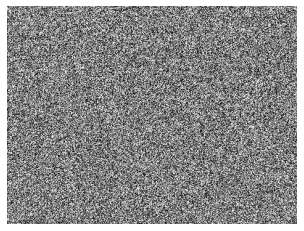

In [26]:
# Read the grayscale image
img_gy = cv2.imread("randomGray.png", cv2.IMREAD_GRAYSCALE)

# Print the image with matplotlib
plt.imshow(img_gy, cmap="gray")
plt.axis("off")
plt.show()


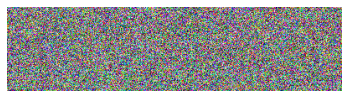

In [27]:
# Read the color image
img_bgr = cv2.imread("randomColor.png", cv2.IMREAD_COLOR)

# Print the image with matplotlib
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [2]:
# Display an image in a window
img = cv2.imread("randomColor.png", cv2.IMREAD_COLOR)
cv2.imshow("Color random image", img)
cv2.waitKey()
cv2.destroyAllWindows()